In [ ]:
!pip install biopython
!pip install biopandas
!pip install py3Dmol
!pip install Bio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 4.7 MB/s eta 0:00:00


In [ ]:
from Bio import SeqIO
from Bio import Entrez
from Bio.PDB import PDBParser, PDBList
from Bio.SeqUtils import seq1
from Bio.PDB.Polypeptide import CaPPBuilder
from Bio.PDB.Atom import Atom
from biopandas.pdb
import PandasPdb
import plotly.express as px
import matplotlib.pyplot as plt

### **INSULINA**

B FACTOR

Structure exists: './pdb1zei.ent' 


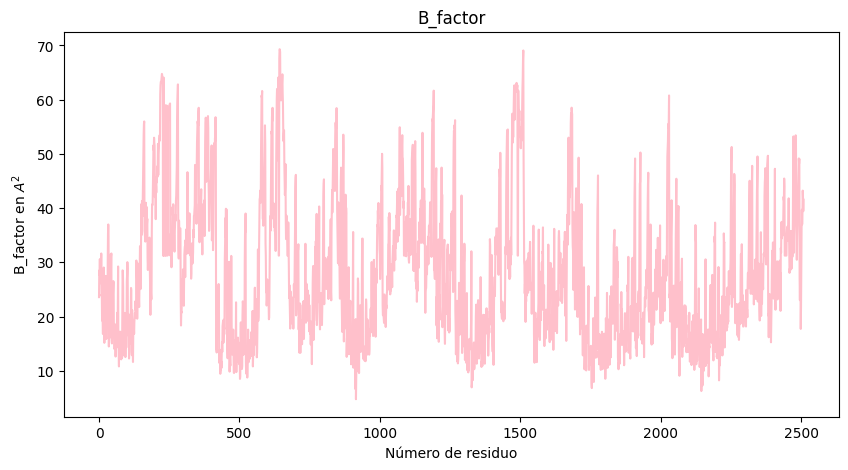

In [ ]:
pdb = PDBList()
pdb.retrieve_pdb_file('1ZEI', pdir='.', file_format='pdb')

ppdb=PandasPdb().read_pdb("/content/1zei.pdb")

ppdb.df["ATOM"]["b_factor"].plot(kind="line",color="pink",figsize=(10,5))
plt.title("B_factor")
plt.xlabel("Número de residuo")
plt.ylabel("B_factor en $A^2$")
plt.show()

In [ ]:
df_atomos = ppdb.df['ATOM']
fig=px.scatter_3d(df_atomos, x="x_coord", y="y_coord", z="z_coord", color="b_factor", template="plotly_dark")
fig.update_traces(marker=dict(size=3))


PROPORCION DE ATOMOS

In [ ]:

conteo_atomos = df_atomos['element_symbol'].value_counts()
proporcion_atomos = conteo_atomos / conteo_atomos.sum()
print(proporcion_atomos)

element_symbol
C    0.632271
O    0.190438
N    0.162948
S    0.014343
Name: count, dtype: float64


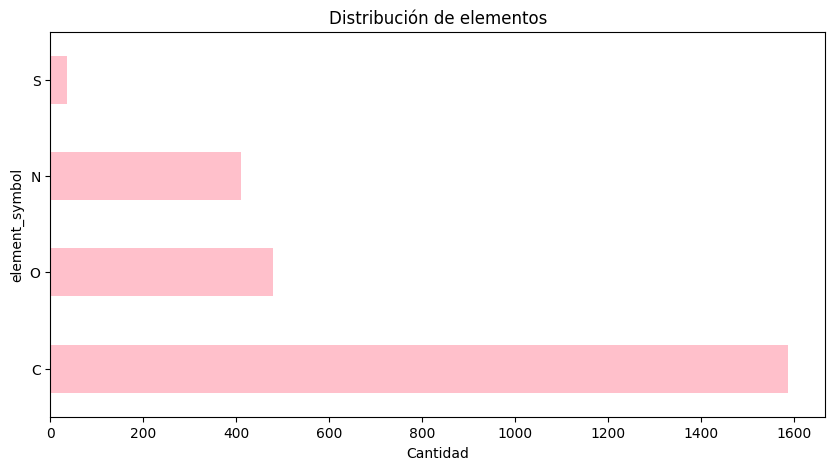

In [ ]:
ppdb.df["ATOM"]["element_symbol"].value_counts().plot(kind="barh",color="pink",figsize=(10,5))
plt.title("Distribución de elementos")
plt.xlabel("Cantidad")
plt.ylabel("element_symbol")
plt.show()

In [ ]:
fig=px.scatter_3d(df_atomos,x="x_coord",y="y_coord",z="z_coord",color="element_symbol",template="plotly_dark",
                  color_discrete_sequence = ["blue", "gray", "pink", "red"])
fig.update_coloraxes(showscale=True)
fig.update_traces(marker=dict(size=3))
fig.show()

SECUENCIA DE AMINOACIDOS

In [ ]:
Entrez.email = "a223201128@unison.mx"

In [ ]:
id_proteina = "NP_001278826.1"
proteina_raw = Entrez.efetch(id = id_proteina, db = "protein", rettype="gb", retmode="text")
Proteina= SeqIO.read(proteina_raw, "genbank") # lee un solo archivo
handle = Entrez.efetch(db="protein", id=id_proteina, rettype="fasta", retmode="text")
record = SeqIO.read(handle, "fasta")
secuencia_aminoacidos = record.seq
print(secuencia_aminoacidos)

MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN


In [ ]:

fig=px.scatter_3d(df_atomos,x="x_coord",y="y_coord",z="z_coord",color="residue_name",template="plotly_dark")
fig.update_traces(marker=dict(size=3))
fig.update_coloraxes(showscale=True)
fig.show()

### **Glucagon**

B FACTOR

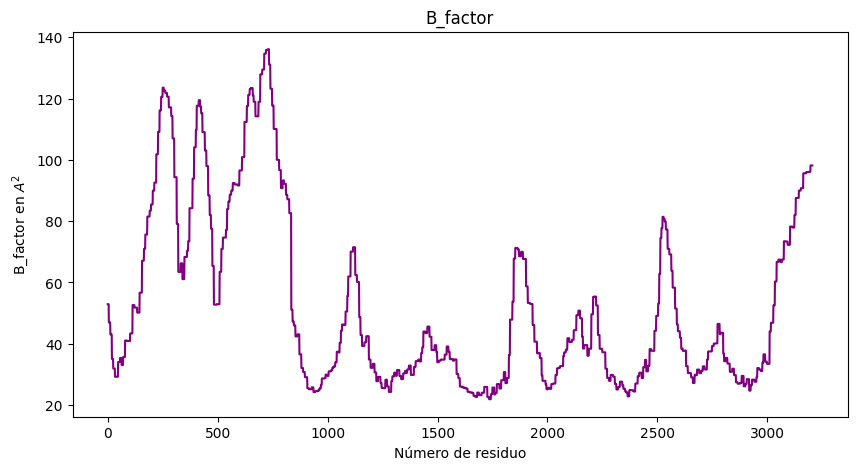

In [ ]:
pdb2 = PDBList()
pdb2.retrieve_pdb_file('7LCK', pdir='.', file_format='pdb')

ppdb2=PandasPdb().read_pdb("/content/7lck.pdb")

ppdb2.df["ATOM"]["b_factor"].plot(kind="line",color="purple",figsize=(10,5))
plt.title("B_factor")
plt.xlabel("Número de residuo")
plt.ylabel("B_factor en $A^2$")
plt.show()

In [ ]:
df_atomos2 = ppdb2.df['ATOM']
fig=px.scatter_3d(df_atomos2, x="x_coord", y="y_coord", z="z_coord", color="b_factor", template="plotly_dark")
fig.update_traces(marker=dict(size=3))

PROPORCION DE ATOMOS

In [ ]:
df_atomos2 = ppdb2.df['ATOM']
conteo_atomos = df_atomos2['element_symbol'].value_counts()
proporcion_atomos = conteo_atomos / conteo_atomos.sum()
print(proporcion_atomos)

element_symbol
C    0.660324
O    0.171553
N    0.162508
S    0.005614
Name: count, dtype: float64


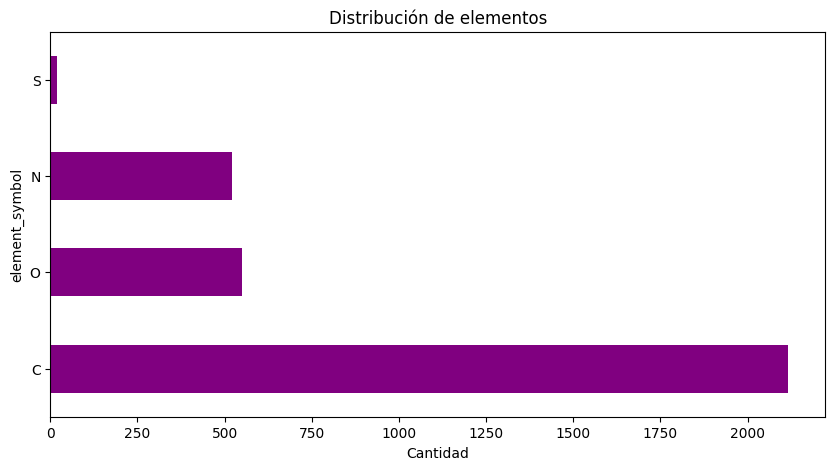

In [ ]:
ppdb2.df["ATOM"]["element_symbol"].value_counts().plot(kind="barh",color="purple",figsize=(10,5))
plt.title("Distribución de elementos")
plt.xlabel("Cantidad")
plt.ylabel("element_symbol")
plt.show()


In [ ]:
fig=px.scatter_3d(df_atomos2,x="x_coord",y="y_coord",z="z_coord",color="element_symbol",template="plotly_dark",
                  color_discrete_sequence = ["purple", "green", "yellow", "orange"])
fig.update_coloraxes(showscale=True)
fig.update_traces(marker=dict(size=3))
fig.show()

SECUENCIA DE AMINOACIDOS

In [ ]:
id_proteina = "KAI4036670.1"
proteina_raw = Entrez.efetch(id = id_proteina, db = "protein", rettype="gb", retmode="text")
Proteina= SeqIO.read(proteina_raw, "genbank")
handle = Entrez.efetch(db="protein", id=id_proteina, rettype="fasta", retmode="text")
record = SeqIO.read(handle, "fasta")
secuencia_aminoacidos = record.seq
print(secuencia_aminoacidos)

MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQMNEDKRHSQGTFTSDYSKYLDSRRAQDFVQWLMNTKRNRNNIAKRHDEFERHAEGTFTSDVSSYLEGQAAKEFIAWLVKGRGRRDFPEEVAIVEELGRRHADGSFSDEMNTILDNLAARDFINWLIQTKITDRK


In [ ]:
fig=px.scatter_3d(df_atomos2,x="x_coord",y="y_coord",z="z_coord",color="residue_name",template="plotly_dark")
fig.update_traces(marker=dict(size=3))
fig.update_coloraxes(showscale=True)
fig.show()

HEMOGLOBINA


Factor B

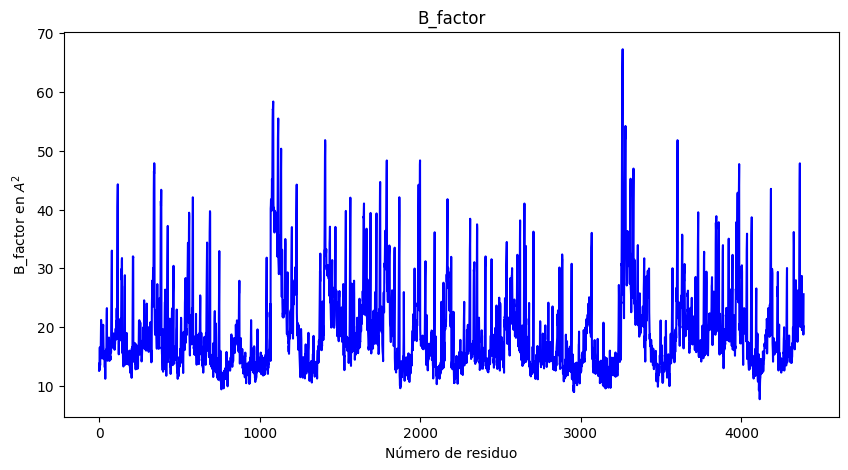

In [ ]:
pdb3 = PDBList()
pdb3.retrieve_pdb_file('1SHR', pdir='.', file_format='pdb')

ppdb3=PandasPdb().read_pdb("/content/1shr.pdb")

ppdb3.df["ATOM"]["b_factor"].plot(kind="line",color="blue",figsize=(10,5))
plt.title("B_factor")
plt.xlabel("Número de residuo")
plt.ylabel("B_factor en $A^2$")
plt.show()

In [ ]:
df_atomos3 = ppdb3.df['ATOM']
fig=px.scatter_3d(df_atomos3, x="x_coord", y="y_coord", z="z_coord", color="b_factor", template="plotly_dark")
fig.update_traces(marker=dict(size=3))

Proporcion de atomos

In [ ]:
df_atomos = ppdb.df['ATOM']
conteo_atomos = df_atomos3['element_symbol'].value_counts()
proporcion_atomos = conteo_atomos / conteo_atomos.sum()
print(proporcion_atomos)

element_symbol
C    0.640839
O    0.180492
N    0.175479
S    0.003191
Name: count, dtype: float64


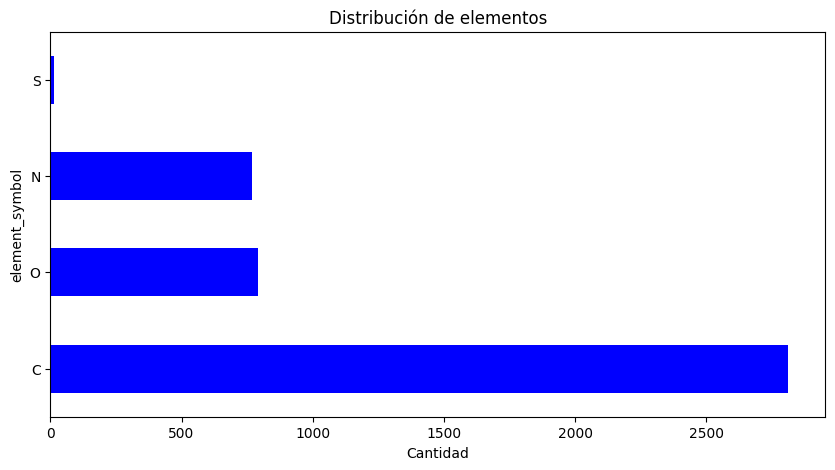

In [ ]:
ppdb3.df["ATOM"]["element_symbol"].value_counts().plot(kind="barh",color="blue",figsize=(10,5))
plt.title("Distribución de elementos")
plt.xlabel("Cantidad")
plt.ylabel("element_symbol")
plt.show()

In [ ]:
fig=px.scatter_3d(df_atomos3,x="x_coord",y="y_coord",z="z_coord",color="element_symbol",template="plotly_dark",
                  color_discrete_sequence = ["crimson", "powderblue", "darksalmon", "purple"])
fig.update_coloraxes(showscale=True)
fig.update_traces(marker=dict(size=3))
fig.show()

Secuencia de aminoacidos

In [ ]:
id_proteina = "WMZ92120.1"
proteina_raw = Entrez.efetch(id = id_proteina, db = "protein", rettype="gb", retmode="text")
Proteina= SeqIO.read(proteina_raw, "genbank")
handle = Entrez.efetch(db="protein", id=id_proteina, rettype="fasta", retmode="text")
record = SeqIO.read(handle, "fasta")
secuencia_aminoacidos = record.seq
print(secuencia_aminoacidos)

MTQTPYEVIGQERLYQLIDHFYSLVEQDNRINHLFPGDFAETARKQKQFLTQFLGGPDLYTQEHGHPMLRMRHLPFPIDDKAKEAWLENMHTAITHAQLPHGAGDYLYERLRLTANHMVNIEN


In [ ]:
fig=px.scatter_3d(df_atomos3,x="x_coord",y="y_coord",z="z_coord",color="residue_name",template="plotly_dark")
fig.update_traces(marker=dict(size=3))
fig.update_coloraxes(showscale=True)
fig.show()

### COLAGENO

Factor B

Structure exists: './pdb5nb1.ent' 


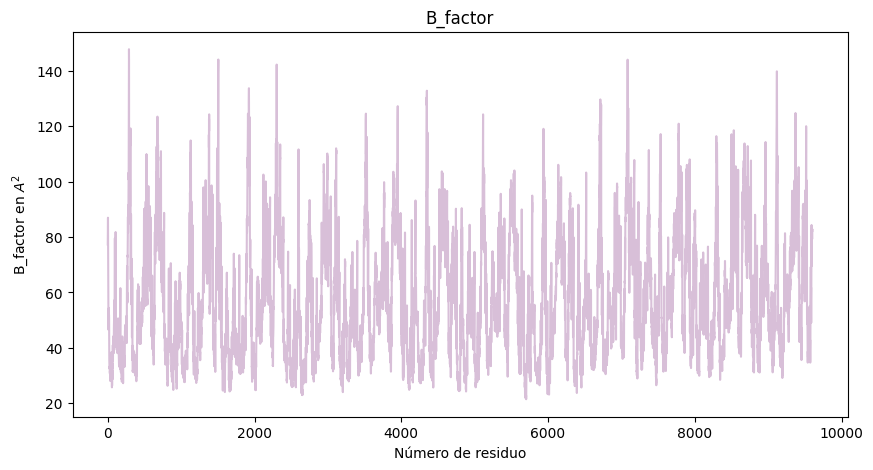

In [ ]:
pdb4 = PDBList()
pdb4.retrieve_pdb_file('5NB1', pdir='.', file_format='pdb')

ppdb4=PandasPdb().read_pdb("/content/5nb1.pdb")

ppdb4.df["ATOM"]["b_factor"].plot(kind="line",color="thistle",figsize=(10,5))
plt.title("B_factor")
plt.xlabel("Número de residuo")
plt.ylabel("B_factor en $A^2$")
plt.show()


In [ ]:

df_atomos4 = ppdb4.df['ATOM']
fig=px.scatter_3d(df_atomos4, x="x_coord", y="y_coord", z="z_coord", color="b_factor", template="plotly_dark")
fig.update_traces(marker=dict(size=3))

Proporcion de atomos

In [ ]:

conteo_atomos = df_atomos4['element_symbol'].value_counts()
proporcion_atomos = conteo_atomos / conteo_atomos.sum()
print(proporcion_atomos)

element_symbol
C    0.635010
O    0.181506
N    0.173487
S    0.009997
Name: count, dtype: float64


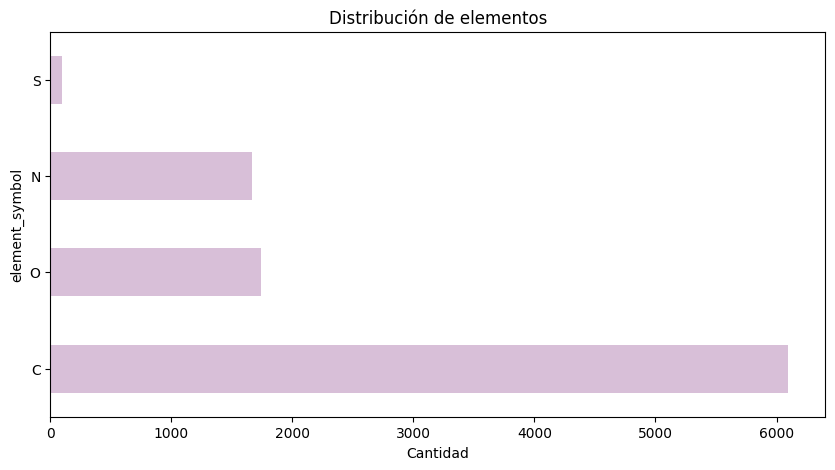

In [ ]:
ppdb4.df["ATOM"]["element_symbol"].value_counts().plot(kind="barh",color="thistle",figsize=(10,5))
plt.title("Distribución de elementos")
plt.xlabel("Cantidad")
plt.ylabel("element_symbol")
plt.show()


In [ ]:
fig=px.scatter_3d(df_atomos4,x="x_coord",y="y_coord",z="z_coord",color="element_symbol",template="plotly_dark",
                  color_discrete_sequence = ["cornflowerblue", "blue", "pink", "mediumpurple"])
fig.update_coloraxes(showscale=True)
fig.update_traces(marker=dict(size=3))
fig.show()

Secuencia de aminoacios

In [ ]:
id_proteina = "BAA04809.1"
proteina_raw = Entrez.efetch(id = id_proteina, db = "protein", rettype="gb", retmode="text")
Proteina= SeqIO.read(proteina_raw, "genbank")
handle = Entrez.efetch(db="protein", id=id_proteina, rettype="fasta", retmode="text")
record = SeqIO.read(handle, "fasta")
secuencia_aminoacidos = record.seq
print(secuencia_aminoacidos)

MHPGLWLLLVTLCLTEELAAAGEKSYGKPCGGQDCSGSCQCFPEKGARGRPGPIGIQGPTGPQGFTGSTGLSGLKGERGFPGLLGPYGPKGDKGPMGVPGFLGINGIPGHPGQPGPRGPPGLDGCNGTQGAVGFPGPDGYPGLLGPPGLPGQKGSKGDPVLAPGSFKGMKGDPGLPGLDGITGPQGAPGFPGAVGPAGPPGLQGPPGPPGPLGPDGNMGLGFQGEKGVKGDVGLPGPAGPPPSTGELEFMGFPKGKKGSKGEPGPKGFPGISGPPGFPGLGTTGEKGEKGEKGIPGLPGPRGPMGSEGVQGPPGQQGKKGTLGFPGLNGFQGIEGQKGDIGLPGPDVFIDIDGAVISGNPGDPGVPGLPGLKGDEGIQGLRGPSGVPGLPALSGVPGALGPQGFPGLKGDQGNPGRTTIGAAGLPGRDGLPGPPGPPGPPSPEFETETLHNKESGFPGLRGEQGPKGNLGLKGIKGDSGFCACDGGVPNTGPPGEPGPPGPWGLIGLPGLKGARGDRGSGGAQGPAGAPGLVGPLGPSGPKGKKGEPILSTIQGMPGDRGDSGSQGFRGVIGEPGKDGVPGLPGLPGLPGDGGQGFPGEKGLPGLPGEKGHPGPPGLPGNGLPGLPGPRGLPGDKGKDGLPGQQGLPGSKGITLPCIIPGSYGPSGFPGTPGFPGPKGSRGLPGTPGQPGSSGSKGEPGSPGLVHLPELPGFPGPRGEKGLPGFPGLPGKDGLPGMIGSPGLPGSKGATGDIFGAENGAPGEQGLQGLTGHKGFLGDSGLPGLKGVHGKPGLLGPKGERGSPGTPGQVGQPGTPGSSGPYGIKGKSGLPGAPGFPGISGHPGKKGTRGKKGPPGSIVKKGLPGLKGLPGNPGLVGLKGSPGSPGVAGLPALSGPKGEKGSVGFVGFPGIPGLPGISGTRGLKGIPGSTGKMGPSGRAGTPGEKGDRGNPGPVGIPSPRRPMSNLWLKGDKGSQGSAGSNGFPGPRGDKGEAGRPGPPGLP

In [ ]:
fig=px.scatter_3d(df_atomos4,x="x_coord",y="y_coord",z="z_coord",color="residue_name",template="plotly_dark")
fig.update_traces(marker=dict(size=3))
fig.update_coloraxes(showscale=True)
fig.show()